과제3_0516. 타이타닉 생존자 예측 모델을 아래 사항을 참조하여 개선하세요.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#주피터 노트북에서는 보통 코드 셀에서 %matplotlib inline을 사용하여 그래프를 편리하게 표시할 수 있습니다.
#그래프를 생성한 뒤에 plt.show()를 호출하지 않아도 그래프가 자동으로 표시

titanic_df = pd.read_csv('../머신러닝/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# 'Age' 열의 결측값을 해당 열의 평균값으로 대체
#fillna() 함수를 사용하여 결측값을 채우고, mean() 함수를 사용하여 평균값을 계산합니다. 
#inplace=True는 변경된 결과를 원본 데이터프레임에 바로 적용
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

# 'Cabin' 열의 결측값을 'N'으로 대체합니다
titanic_df['Cabin'].fillna('N',inplace=True)

#'Embarked' 열의 결측값을 'N'으로 대체
titanic_df['Embarked'].fillna('N',inplace=True)

#isnull().sum().sum()은 결측값이 있는 셀의 개수를 계산하는 코드
print('데이터 세트 Null 값 갯수',titanic_df.isnull().sum().sum()) 


데이터 세트 Null 값 갯수 0


In [7]:
# value_counts() 함수는 각 값의 개수를 세어서 반환하는 함수이며, 
# 해당 열의 값들과 그에 해당하는 개수가 출력됨
# 해당 열에는 어떤 값들이 있고, 각 값들이 몇 번 나타나는지 확인

print('Sex 값 분포: \n', titanic_df['Sex'].value_counts())

print('\n Cabin 값 분포: \n',titanic_df['Cabin'].value_counts())

print('\n Embarked 값 분포: \n',titanic_df['Embarked'].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [8]:
# 'Cabin' 열의 값을 문자열의 첫 번째 문자로 대체하는 작업

#.str[:1]은 선택한 'Cabin' 열의 각 값에 대해 첫 번째 문자만을 남기고 나머지 문자는 제거하는 연산
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [9]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

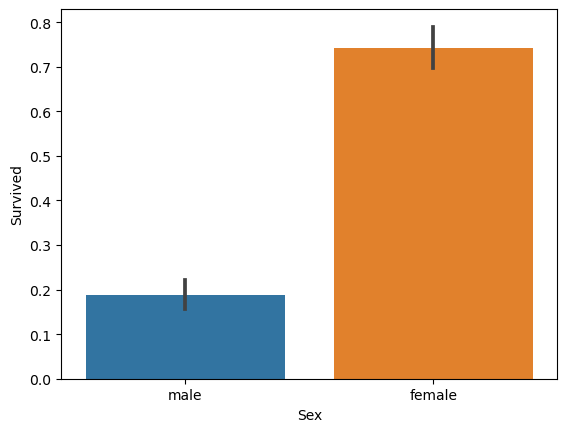

In [10]:
sns.barplot(x='Sex',y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

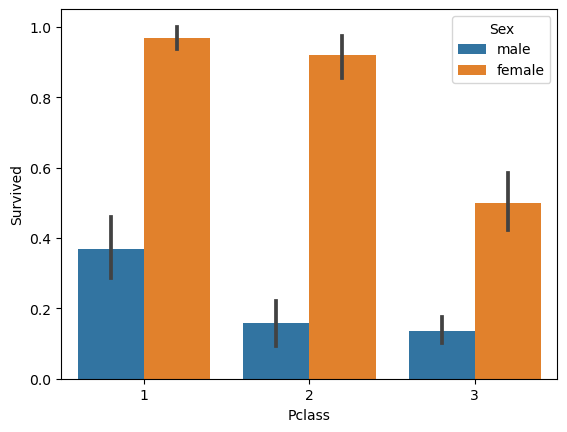

In [11]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

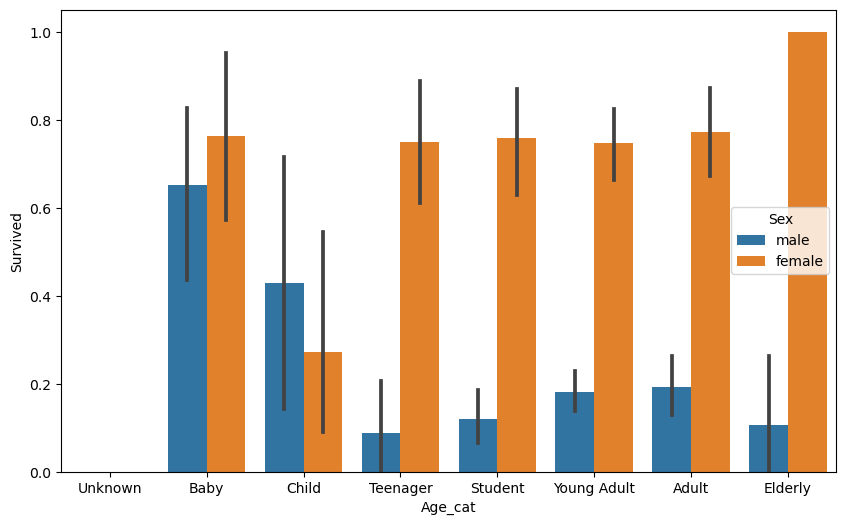

In [12]:
#입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용.

def get_category(age):
    cat=''
    if age <= -1: cat ='Unknown'
    elif age <=5 : cat ='Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'  
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))


sns.barplot(x='Age_cat', y='Survived', hue='Sex', data= titanic_df, order = group_names)
#order=group_names는 막대 그래프의 x축 범주 순서를 지정하는 것

titanic_df.drop('Age_cat', axis=1, inplace=True)
# 그래프를 그린 후에 사용된 'Age_cat' 열을 삭제하는 작업

In [13]:
# 머신러닝 모델에 입력하기 전에 범주형 변수를 숫자형으로 인코딩하는 작업을 수행하는 함수와 
# 이를 적용하는 과정

from sklearn import preprocessing

def encode_features(dataDF):#encode_features() 함수는 인자로 데이터프레임 dataDF를 받는다
    features = ['Cabin','Sex','Embarked'] # 세 개의 범주형 변수를 숫자형으로 인코딩
    for feature in features: #features 리스트에 인코딩할 변수 이름을 저장
        
        # 각 변수에 대해 LabelEncoder() 객체를 생성
        le = preprocessing.LabelEncoder()
        # fit() 메서드를 통해 인코딩할 변수의 범주를 학습
        le = le.fit(dataDF[feature])
        # transform() 메서드를 통해 실제로 변수를 인코딩
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [14]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True) #결측에 나이 평균값 입력
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True) #결측값을 0으로 입력
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin']= df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [15]:
# 원본 데이터를 재 로딩하고, feature데이터 셋과 Label 데이터 셋 추출.

titanic_df = pd.read_csv('../머신러닝/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


In [21]:
# KFold 교차 검증을 수행하는 함수 exec_kfold를 정의하고 호출

# DecisionTreeClassifier를 사용하여 5개의 폴드로 KFold 교차 검증을 수행하고, 
# 각 폴드에서의 정확도와 평균 정확도를 출력하는 코드


from sklearn.model_selection import KFold #KFold 객체는 데이터를 지정한 폴드 수로 나누어주는 기능을 제공

def exec_kfold(clf,folds=5): #exec_kfold 함수는 입력으로 분류기(clf)와 폴드 수(folds)를 받는다.
    # 폴드 세트를 5개인 kFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
    
    kfold = KFold(n_splits=folds)# n_splits 매개변수에 폴드 수를 지정하여 KFold 객체를 생성
    scores = []
    
    # kFold 교차 검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
#         KFold.split() 메서드를 사용하여 데이터를 학습과 검증 데이터로 나누는 인덱스를 생성
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증{0} 정확도: {1: .4f}".format(iter_count, accuracy))
        
    # 5개의 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0: .4f}".format(mean_score))
    
#exec_kfold 호출
exec_kfold(dt_clf,folds=5)
    

#모델의 안정성과 일반화 성능을 평가

교차 검증0 정확도:  0.7542
교차 검증1 정확도:  0.7809
교차 검증2 정확도:  0.7865
교차 검증3 정확도:  0.7697
교차 검증4 정확도:  0.8202
평균 정확도:  0.7823


In [22]:
#cross_val_score 함수를 사용하여 교차 검증을 수행
from sklearn.model_selection import cross_val_score

# cross_val_score 함수는 입력으로 분류기(dt_clf), 피처 데이터(X_titanic_df), 타깃 데이터(y_titanic_df), 
# 그리고 폴드 수(cv)를 받습니다.
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)


for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


### 분류기(Classifier)

지도 학습(Supervised Learning)에서 사용되는 알고리즘으로, 입력 데이터를 미리 정의된 클래스 레이블로 분류하는 작업을 수행합니다. 분류기는 주어진 입력 데이터의 특징을 기반으로 판단하고 예측하는 데 사용.
분류기는 주어진 데이터와 특징에 따라 선택되고 조정되어야 하며, 문제의 특성에 맞는 분류기를 선택하는 것이 중요합니다.

### 피처 데이터(Feature data)

머신 러닝 또는 데이터 분석 작업에서 입력으로 사용되는 독립 변수(Independent variable)를 말합니다. 피처 데이터는 주어진 문제에 대해 예측이나 분류를 수행하는 데 사용되는 다양한 속성이나 측정값을 포함합니다.

예를 들어, 타이타닉 데이터셋을 기준으로 설명하면, 각 승객에 대한 특징이 피처 데이터가 될 수 있습니다. 피처 데이터는 승객의 나이, 성별, 승선 항구, 객실 등급, 가족 동반 여부 등과 같은 정보를 포함할 수 있습니다. 이러한 피처 데이터는 예측 모델을 훈련하거나 분석을 수행하는 데 사용됩니다.

피처 데이터는 일반적으로 행렬 형태로 표현됩니다. 각 행은 개별 샘플 또는 관측치를 나타내며, 각 열은 특정 피처의 값을 나타냅니다. 이러한 행렬 형태의 피처 데이터는 머신 러닝 알고리즘에 입력으로 제공되어 모델의 학습 및 예측에 활용됩니다.

### 폴드 수(cv)

교차 검증(Cross-validation)을 수행할 때 데이터를 몇 개의 폴드(fold)로 나눌 것인지를 결정하는 매개변수입니다. 교차 검증은 모델의 성능을 평가하고 일반화 성능을 추정하는 데 사용되는 통계적인 방법.

일반적으로 교차 검증은 데이터를 훈련 세트와 테스트 세트로 나누는 단일 분할(Single split) 방식이 아닌, 데이터를 여러 개의 폴드로 나누어서 모델을 학습하고 평가하는 방식으로 수행됩니다. 이때 폴드 수(cv)는 데이터를 몇 개의 그룹(폴드)으로 나눌 것인지를 결정.

폴드 수(cv)를 지정함으로써 데이터를 얼마나 세분화하여 교차 검증을 수행할지를 결정할 수 있습니다. 일반적으로 데이터셋의 크기에 따라 적절한 폴드 수를 선택하며, 일반적으로 5 또는 10을 많이 사용.

더 작은 폴드 수는 더 많은 훈련 데이터를 사용하게 되지만, 분할된 폴드의 크기가 작아져서 모델의 성능을 신뢰할 수 없게 할 수 있습니다. 반면, 더 큰 폴드 수는 데이터를 더 세분화하여 모델의 성능을 더 정확하게 평가할 수 있지만, 훈련 데이터의 양이 줄어들게 됩니다.

따라서, 폴드 수(cv)는 교차 검증 시 모델의 성능 평가와 일반화 성능 추정에 영향을 미치는 중요한 매개변수입니다. 데이터의 특성과 규모에 맞게 적절한 폴드 수를 선택하여 모델의 성능을 신뢰할 수 있는 방법으로 평가할 수 있습니다.

In [24]:
#GridSearchCV는 그리드 서치(Grid Search)를 수행하기 위한 클래스
from sklearn.model_selection import GridSearchCV 

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0: .4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))



# DecisionTreeClassifier 모델을 대상으로 그리드 서치를 수행하여 최적의 하이퍼파라미터를 찾고, 
# 해당 하이퍼파라미터로 학습된 모델을 사용하여 테스트 세트에서의 정확도를 평가하는 과정을 나타낸다.
# 이를 통해 최적의 모델을 선택하고, 이 모델을 사용하여 예측을 수행할 수 있다.

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


## GridSearchCV
주어진 하이퍼파라미터 후보들의 조합을 탐색하며, 각 조합에 대해 교차 검증을 수행하여 성능을 평가합니다. 그리고 가장 우수한 성능을 보인 모델의 하이퍼파라미터 조합과 정확도를 출력합니다. 그 후, 최적의 모델로 예측을 수행하고 테스트 세트에서의 정확도를 계산하여 출력합니다.

## GridSearchCV의 주요 매개변수와 동작

- estimator: 사용할 분류기 모델입니다. 이 경우에는 dt_clf인 DecisionTreeClassifier 입니다.
- param_grid: 탐색할 하이퍼파라미터의 후보들을 딕셔너리 형태로 지정합니다. 이 경우에는 max_depth,min_samples_split, min_samples_leaf에 대한 후보값들이 지정되어 있습니다.
- scoring: 모델의 성능을 평가하기 위한 지표를 선택합니다. 여기서는 'accuracy'를 선택했습니다.
- cv: 교차 검증을 위해 데이터를 몇 개의 폴드로 나눌 것인지를 결정합니다. 이 경우에는 5개의 폴드로 교차 검증을 수행합니다.
- best_params_: 그리드 서치를 수행한 결과에서 가장 우수한 성능을 보인 하이퍼파라미터 조합입니다.
- best_score_: 가장 우수한 성능을 보인 모델의 평균 정확도입니다.
- best_estimator_: 가장 우수한 성능을 보인 모델의 추정기(estimator)입니다